# Visualizing Cycle Checking Strategies: Maze

Cycles are an issue with DFS and we need cycle checking.



# Code

Helper functions for the Maze Assignment by M. Hahsler
Usage: 
  import maze_helper as mh
  mh.show_some_mazes()
  
Here is an example maze:

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX

The goal is at (np.int64(8), np.int64(1)).


<Figure size 640x480 with 0 Axes>

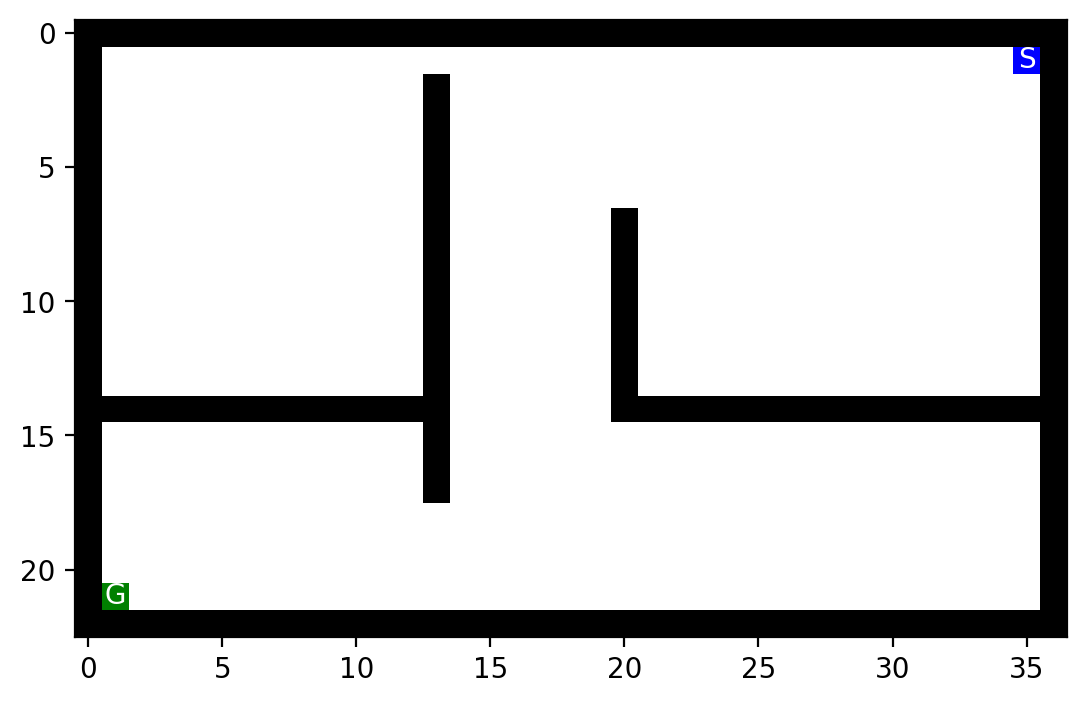

In [10]:
%run maze_helper.py
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np


#f = open("small_maze.txt", "r")
#f = open("medium_maze.txt", "r")
#f = open("large_maze.txt", "r")    # this has only one solution!
f = open("open_maze.txt", "r")
#f = open("empty_maze.txt", "r")
#f = open("empty_maze_2.txt", "r")
#f = open("loops_maze.txt", "r")
#f = open("L_maze.txt", "r")

maze_str = f.read()
maze = parse_maze(maze_str)

show_maze(maze)

In [11]:
# tree_search_solution.py has my actual implementation (not published)
import tree_search_solution as ts

# order in which we add new states to the frontier
ts.set_order("NESW")
#ts.set_order(random=True)


Directions are checked in the order ['N', 'E', 'S', 'W']


## DFS Cycle checking option 1: Check the path

Do not expand nodes for states that are already in the current path. It works like this:

* Expand puts all new states into the frontier.
* When a state is taken from the frontier then we check if we already have a node for this state in the current path from the root node. If so,
then we ignore the state and pick the next one from the frontier. 
hen we try to add a frontier node to the current path then
we check if the state already exists in the path. 

Turns out that this does not manage the frontier well because there are cases where the same state gets added multiple times to the frontier leading to clearing 
space and then re-exploring it over and over again.


In [12]:
%time result = ts.DFS(maze, vis = False, animation = True, max_tries=500, frontier_option = 3)

ts.animate_maze(result)

CPU times: user 36.5 ms, sys: 153 μs, total: 36.7 ms
Wall time: 34.1 ms
No solution found.


The room looks solid red, but there are still some of the red points left in the frontier!

## DFS Cycle checking option 2: Check the path + don't add states that are already in the frontier a second time.

This unfortunately does not work and produces still an infinite loop if there are any open spaces in the maze!

In [13]:
%time result = ts.DFS(maze, animation = True, max_tries = 500, frontier_option = 2)

ts.animate_maze(result)

CPU times: user 42.4 ms, sys: 3.96 ms, total: 46.4 ms
Wall time: 43.9 ms
No solution found.


Note that there are still frontier entires (orange squares) left when DFS removed a completed branch from memory (squares that turn white). This is a problem, since DFS will explore them again leading to an infinite loop.



## DFS Cycle checking option 3: Check the path + fix the frontier by moving found states to the top of the frontier stack

Increasing the priority of a frontier entry when we see it again solves this issue (i.e., remove it from the stack and put it again on the top). 
Note that there are no orange squares left when DFS removes a path from memory so it knows that this part of the maze is done.

In [14]:
%time result = ts.DFS(maze, vis = False, animation = True, max_tries=500, frontier_option = 1)

ts.animate_maze(result)

CPU times: user 55.3 ms, sys: 99 μs, total: 55.4 ms
Wall time: 51 ms
Path length: 54
Reached squares: 0
Action sequence: ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S']
